In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your file in Google Drive
file_path = '/content/drive/My Drive/locations (1).csv'
# Read the CSV file
import pandas as pd
df = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Initialize geolocator
geolocator = Nominatim(user_agent="Trips")

# Get latitude and longitude for each city
def get_coordinates(city, country='India'):
    location = geolocator.geocode(f"{city}, {country}")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Apply geocoding
df[['latitude', 'longitude']] = df['location'].apply(lambda city: pd.Series(get_coordinates(city)))

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df['loc_clusters'] = kmeans.fit_predict(df[['latitude', 'longitude']])

# User input for city name
input_city = input("Enter a city name: ").strip()

# Find the cluster for the input city
input_city_cluster = df.loc[df['location'] == input_city, 'loc_clusters']
if not input_city_cluster.empty:
    cluster = input_city_cluster.iloc[0]

    # Recommend cities in the same cluster
    recommended_cities = df.loc[(df['loc_clusters'] == cluster) & (df['location'] != input_city), 'location']

    # Print recommended cities
    if recommended_cities.empty:
        print(f"No cities found in the same cluster as {input_city}.")
    else:
        print(f"Recommended cities similar to {input_city}:")
        for city in recommended_cities:
            print(city)
else:
    print(f"City '{input_city}' not found in the dataset.")



Enter a city name: Pune
Recommended cities similar to Pune:
Rajkot
Nashik
Rajkot


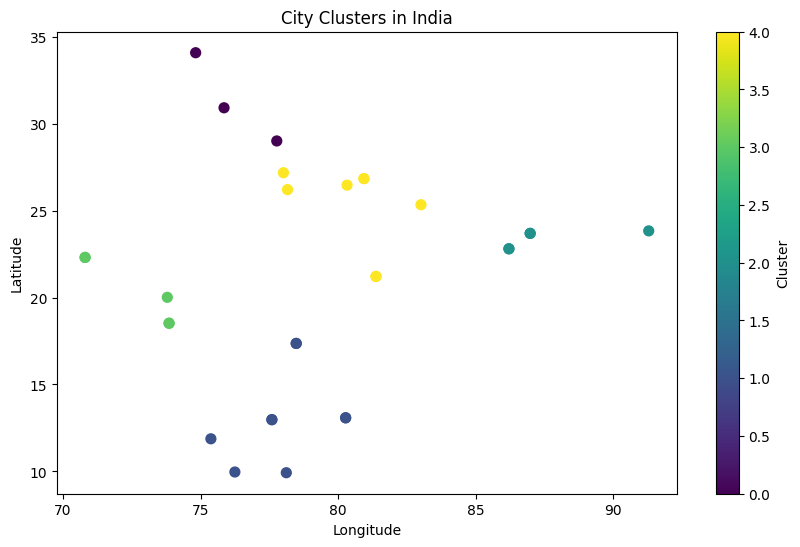

In [11]:
import matplotlib.pyplot as plt

# Plot cities on a map
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['loc_clusters'], cmap='viridis', s=50)
plt.title('City Clusters in India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


In [12]:
#distance calculation
from geopy.distance import great_circle

def recommend_by_distance(input_city, recommended_cities):
    distances = []
    input_lat, input_lon = df.loc[df['location'] == input_city, ['latitude', 'longitude']].values[0]
    for city in recommended_cities:
        lat, lon = df.loc[df['location'] == city, ['latitude', 'longitude']].values[0]
        distance = great_circle((input_lat, input_lon), (lat, lon)).kilometers
        distances.append((city, distance))
    distances.sort(key=lambda x: x[1])
    return distances

# Example usage:
recommended_cities = recommend_by_distance(input_city, recommended_cities)
for city, distance in recommended_cities:
    print(f"{city}: {distance:.2f} km away")



Nashik: 165.80 km away
Rajkot: 527.36 km away
Rajkot: 527.36 km away
